In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
#from scipy.stats import skew
#from collections import OrderedDict
import statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1="/content/drive/My Drive/KAGGLE/analyticsclubprojecttask/train.csv"
df_train=pd.read_csv(path1)
path2="/content/drive/My Drive/KAGGLE/analyticsclubprojecttask/test.csv"
df_test=pd.read_csv(path2)

In [ ]:
train=df_train.copy()
val=df_test.copy()
#train_lat=df_train.copy()

In [ ]:
val["zipcode"]=val["zipcode"]-val["zipcode"].min()
val=val.sort_values(by=['zipcode'])
#val["zipcode"]=train["zipcode"]
val.head()

,id,date,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2909,1311800220,2/18/2015,4,1450,7560,1.0,0,3,7,1450,0,1967,0,0,47.3375,-122.276,1430,7560
1574,3750605620,3/24/2015,3,1580,14400,1.0,0,4,7,1580,0,1981,0,0,47.2598,-122.281,1480,9600
2833,2154900330,8/27/2014,4,1820,8217,1.0,0,3,7,1120,700,1987,0,0,47.2630,-122.242,1310,8217
311,1311100520,4/14/2015,4,1730,8400,1.0,0,3,7,1730,0,1962,0,0,47.3386,-122.288,1550,7920
3088,3751602249,3/5/2015,4,1340,7920,1.0,0,4,7,1340,0,1970,0,0,47.2845,-122.267,1090,9600


In [ ]:
train=train.drop('id',axis=1)

val1=pd.DataFrame(val["id"])
val=val.drop('id',axis=1)
val1.head()

,id
2909,1311800220
1574,3750605620
2833,2154900330
311,1311100520
3088,3751602249


In [ ]:
val.head()

,date,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2909,2/18/2015,4,1450,7560,1.0,0,3,7,1450,0,1967,0,0,47.3375,-122.276,1430,7560
1574,3/24/2015,3,1580,14400,1.0,0,4,7,1580,0,1981,0,0,47.2598,-122.281,1480,9600
2833,8/27/2014,4,1820,8217,1.0,0,3,7,1120,700,1987,0,0,47.2630,-122.242,1310,8217
311,4/14/2015,4,1730,8400,1.0,0,3,7,1730,0,1962,0,0,47.3386,-122.288,1550,7920
3088,3/5/2015,4,1340,7920,1.0,0,4,7,1340,0,1970,0,0,47.2845,-122.267,1090,9600


In [ ]:
for row in train:
  if row!="date":
    train[row]=train[row].astype(float)
for row in val:
  if row!="date":
    val[row]=val[row].astype(float)

In [ ]:
train["price_sq_lot"]=train["price"]/train["sqft_lot"]
train.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sq_lot
0,10/13/2014,221900.0,3.0,1180.0,5650.0,1.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,39.274336
1,12/9/2014,538000.0,3.0,2570.0,7242.0,2.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,74.288870
2,2/25/2015,180000.0,2.0,770.0,10000.0,1.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,18.000000
3,12/9/2014,604000.0,4.0,1960.0,5000.0,1.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,120.800000
4,2/18/2015,510000.0,3.0,1680.0,8080.0,1.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,63.118812


In [ ]:
A=train["price_sq_lot"].mean()

In [ ]:
train["lat"].max()

47.7776

In [ ]:
train["price_check"]=train["price_sq_lot"].apply(lambda x: 1 if x>A else 0)

In [ ]:
train["zipcode"].max()
train["zipcode"].min()

98001.0

In [ ]:
train["zipcode"]=train["zipcode"]-train["zipcode"].min()

In [ ]:
train=train.sort_values(by=["zipcode"])

In [ ]:
a=0
i=0
z=[0]
for j in range(train.shape[0]):
  x=train["zipcode"].values[j]
  if x<a+5:
    y=i
   
  if x>a+5:
    
    a=x
    i=i+1
    print(a,j,i,x)
    z.append(i)  
  train["zipcode"].values[j]=y
print(z)

6.0 1451 1 6.0
13.0 2046 2 13.0
21.0 2297 3 21.0
27.0 3265 4 27.0
33.0 4598 5 33.0
39.0 5568 6 39.0
51.0 6396 7 51.0
57.0 7698 8 57.0
64.0 8424 9 64.0
71.0 8762 10 71.0
91.0 9784 11 91.0
101.0 10070 12 101.0
107.0 11293 13 107.0
114.0 11735 14 114.0
121.0 13460 15 121.0
132.0 14300 16 132.0
143.0 14894 17 143.0
154.0 15433 18 154.0
165.0 15790 19 165.0
176.0 16206 20 176.0
187.0 16626 21 187.0
197.0 16738 22 197.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


[62.26454055806141, 60.73637538021826, 33.0408407956844, 53.495957394507975, 73.83536277903889, 60.27500747707341, 50.871411653109696, 67.47489176464053, 48.44829834566871, 61.13278538261684, 61.08955745322365, 34.526899186795745, 202.53073065198106, 210.1754370704842, 149.63773096129222, 130.0921118704049, 101.28292122229541, 112.37346883958364, 46.001812772103136, 32.85544591797422, 55.17117890970064, 30.166521140190333, 108.99076865128221] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


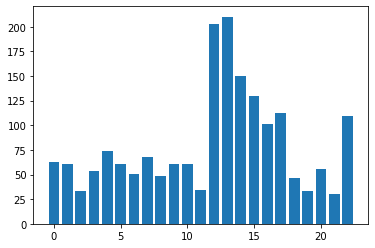

In [ ]:
a=0
price=0
count=0
y=[]
#z=[0,1,2,3,4,5,6,7,8]
for i in range(train.shape[0]):
  x=train["zipcode"].values[i]
  
  if x==a:
    price+=train["price_sq_lot"].values[i]
    count=count+1
  
  if x>a:
    #print(count)
    y.append(price/count)
    price=0
    count=0
    a=a+1
y.append(price/count)
print(y,z)

plt.bar(z,y)
plt.show()


In [ ]:
a=statistics.mean(y)
b=statistics.stdev(y)
for i in range(len(y)):
  
  y[i]=(y[i])/a
print(y)

[0.7755795595189509, 0.7565444286903763, 0.41156331550470115, 0.6663563354071081, 0.9197080333017053, 0.7507975378936218, 0.6336644691890818, 0.8404807353329667, 0.6034816856206857, 0.761482190894893, 0.7609437351681311, 0.4300739557835421, 2.5227632527319392, 2.6179872435230624, 1.8639174789726844, 1.6204533417740856, 1.2616003061185392, 1.3997463834644308, 0.5730077724349601, 0.40925399986047106, 0.6872232293599871, 0.37576021550035804, 1.3576107939537196]


In [ ]:
j=0

for i in range(train.shape[0]):
  x=train["zipcode"].values[i]
  
  if x==j:
    train["zipcode"].values[i]=y[j]
  if x>j:
    j=j+1


In [ ]:
train.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sq_lot,price_check
7173,2/25/2015,274000.0,5.0,1950.0,8720.0,1.0,0.0,3.0,7.0,1050.0,900.0,1962.0,0.0,0.77558,47.3381,-122.289,1660.0,8030.0,31.422018,0
15630,8/8/2014,359000.0,4.0,2575.0,4725.0,2.0,0.0,3.0,8.0,2575.0,0.0,2011.0,0.0,0.77558,47.3058,-122.277,2575.0,5323.0,75.978836,0
8137,7/16/2014,270000.0,4.0,1850.0,7350.0,1.0,0.0,3.0,7.0,1050.0,800.0,1965.0,0.0,0.77558,47.3413,-122.277,1450.0,7250.0,36.734694,0
6656,11/7/2014,248000.0,3.0,1330.0,9831.0,1.0,0.0,3.0,7.0,1330.0,0.0,1987.0,0.0,0.77558,47.3304,-122.277,1330.0,7500.0,25.226325,0
6655,6/30/2014,359500.0,4.0,2140.0,10316.0,2.0,0.0,3.0,8.0,2140.0,0.0,1993.0,0.0,0.77558,47.3537,-122.274,1920.0,11337.0,34.848779,0


In [ ]:
val["zipcode"].max()

198.0

In [ ]:
val["long"].min()


-122.515

In [ ]:
a=0
i=0
z=[0]
for j in range(val.shape[0]):
  x=val["zipcode"].values[j]
  if x<a+5:
    y_val=i
   
  if x>a+5:
    
    a=x
    i=i+1
    print(a,j,i,x)
    z.append(i)  
  val["zipcode"].values[j]=y_val
print(z)

6.0 353 1 6.0
13.0 473 2 13.0
21.0 535 3 21.0
27.0 782 4 27.0
33.0 1129 5 33.0
39.0 1337 6 39.0
51.0 1555 7 51.0
57.0 1888 8 57.0
64.0 2078 9 64.0
71.0 2161 10 71.0
91.0 2400 11 91.0
101.0 2465 12 101.0
107.0 2769 13 107.0
114.0 2889 14 114.0
121.0 3299 15 121.0
132.0 3502 16 132.0
143.0 3655 17 143.0
154.0 3793 18 154.0
165.0 3878 19 165.0
176.0 3976 20 176.0
187.0 4068 21 187.0
197.0 4091 22 197.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


In [ ]:
val["zipcode"]

2909     0.0
1574     0.0
2833     0.0
311      0.0
3088     0.0
        ... 
1213    22.0
4082    22.0
3404    22.0
3085    22.0
1700    22.0
Name: zipcode, Length: 4210, dtype: float64

In [ ]:
j=0

for i in range(val.shape[0]):
  
  x=val["zipcode"].values[i]
  
  if x==j:
    val["zipcode"].values[i]=y[j]
  if x>j:
    j=j+1


In [ ]:
val.head()

,date,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2909,2/18/2015,4.0,1450.0,7560.0,1.0,0.0,3.0,7.0,1450.0,0.0,1967.0,0.0,0.77558,47.3375,-122.276,1430.0,7560.0
1574,3/24/2015,3.0,1580.0,14400.0,1.0,0.0,4.0,7.0,1580.0,0.0,1981.0,0.0,0.77558,47.2598,-122.281,1480.0,9600.0
2833,8/27/2014,4.0,1820.0,8217.0,1.0,0.0,3.0,7.0,1120.0,700.0,1987.0,0.0,0.77558,47.2630,-122.242,1310.0,8217.0
311,4/14/2015,4.0,1730.0,8400.0,1.0,0.0,3.0,7.0,1730.0,0.0,1962.0,0.0,0.77558,47.3386,-122.288,1550.0,7920.0
3088,3/5/2015,4.0,1340.0,7920.0,1.0,0.0,4.0,7.0,1340.0,0.0,1970.0,0.0,0.77558,47.2845,-122.267,1090.0,9600.0


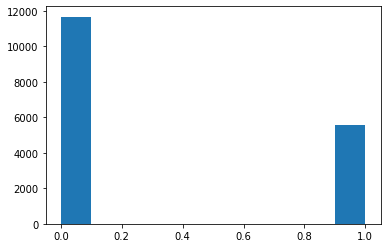

In [ ]:
plt.hist(train["price_check"])
plt.show()

In [ ]:
train=train.drop('price_check',axis=1)

In [ ]:

for i in range(train.shape[0]):
  train["date"].values[i]=np.float64(train['date'].values[i].split('/')[1])
  #print(train["date"].values)
  #print(a)
#train["date_check"]=a
for i in range(val.shape[0]):
  val["date"].values[i]=np.float64(val['date'].values[i].split('/')[1])
  #print(train["date"].values)
  #print(a)
#train["date_check"]=a

In [ ]:
for i in range(df_train.shape[0]):
  df_train["date"].values[i]=np.float64(df_train['date'].values[i].split('/')[0])
  #print(train["date"].values)
  #print(a)
#train["date_check"]=a
for i in range(df_test.shape[0]):
  df_test["date"].values[i]=np.float64(df_test['date'].values[i].split('/')[0])
  #print(train["date"].values)
  #print(a)
#train["date_check"]=a

In [ ]:
train["date-check"]=train["date-check"].astype(float)
val["date-check"]=val["date-check"].astype(float)

In [ ]:
train["month-check"]=train["month-check"].astype(float)
val["month-check"]=val["month-check"].astype(float)

In [ ]:
train["extra"]=(train["sqft_living15"]-train["sqft_living"])+(train["sqft_lot15"]-train["sqft_lot"])
val["extra"]=(val["sqft_living15"]-val["sqft_living"])+(val["sqft_lot15"]-val["sqft_lot"])

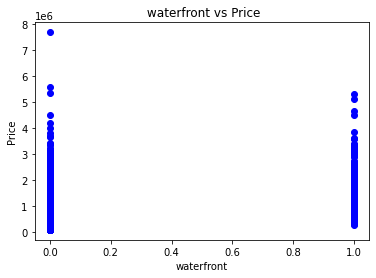

In [ ]:

plt.scatter(train["waterfront"], train["price"], c = "blue", marker = "o")
plt.title(" waterfront vs Price")
plt.xlabel("waterfront")
plt.ylabel("Price")
plt.show()

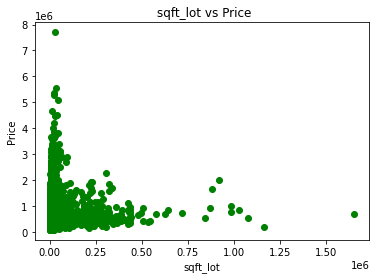

In [ ]:

plt.scatter(train["sqft_lot"], train["price"], c = "green", marker = "o")
plt.title(" sqft_lot vs Price")
plt.xlabel("sqft_lot")
plt.ylabel("Price")
plt.show()

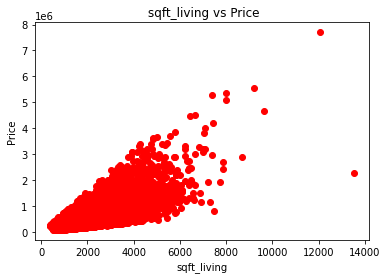

In [ ]:

plt.scatter(train["sqft_living"], train["price"], c = "red", marker = "o")
plt.title(" sqft_living vs Price")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.show()

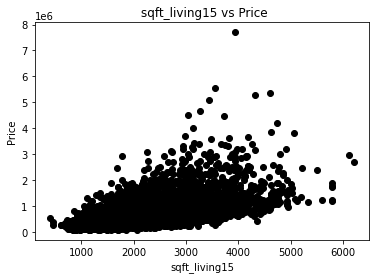

In [ ]:

plt.scatter(train["sqft_living15"], train["price"], c = "black", marker = "o")
plt.title(" sqft_living15 vs Price")
plt.xlabel("sqft_living15")
plt.ylabel("Price")
plt.show()

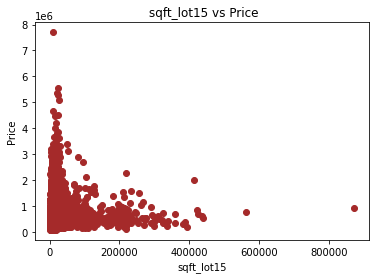

In [ ]:

plt.scatter(train["sqft_lot15"], train["price"], c = "brown", marker = "o")
plt.title(" sqft_lot15 vs Price")
plt.xlabel("sqft_lot15")
plt.ylabel("Price")
plt.show()

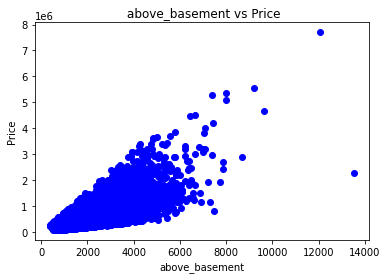

In [ ]:

plt.scatter(train["sqft_above"]+train["sqft_basement"], train["price"], c = "blue", marker = "o")
plt.title(" above_basement vs Price")
plt.xlabel("above_basement")
plt.ylabel("Price")
plt.show()

In [ ]:
train=train.drop('date',axis=1)
val=val.drop('date',axis=1)

In [ ]:
test=train['price_sq_lot']

In [ ]:
train=train.drop('price_sq_lot',axis=1)


In [ ]:
train=train.drop('price',axis=1)

In [ ]:
train["date-check"]=train["date"]

In [ ]:
val["date-check"]=val["date"]

In [ ]:
train=train.drop('extra',axis=1)
val=val.drop('extra',axis=1)

In [ ]:
train=train.drop('date-check',axis=1)
val=val.drop('date-check',axis=1)

In [ ]:
train=train.drop('month-check',axis=1)
val=val.drop('month-check',axis=1)

In [ ]:
train["month-check"]=df_train["date"]
val["month-check"]=df_train["date"]

In [ ]:
train['yr_built']=2015-train['yr_built']
val['yr_built']=2015-val['yr_built']

In [ ]:
for i in range(train.shape[0]):
  if train["yr_renovated"].values[i]>0:
    train["yr_renovated"].values[i]=2015-train["yr_renovated"].values[i]
  else:
    train["yr_renovated"].values[i]=train["yr_built"].values[i]

In [ ]:
for i in range(val.shape[0]):
  if val["yr_renovated"].values[i]>0:
    val["yr_renovated"].values[i]=2015-val["yr_renovated"].values[i]
  else:
    val["yr_renovated"].values[i]=val["yr_built"].values[i]

In [ ]:
train.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sq_lot,price_check,extra,date-check,month-check
7173,274000.0,5.0,1950.0,8720.0,1.0,0.0,3.0,7.0,1050.0,900.0,53.0,53.0,0.77558,47.3381,-122.289,1660.0,8030.0,31.422018,0,-980.0,25.0,2.0
15630,359000.0,4.0,2575.0,4725.0,2.0,0.0,3.0,8.0,2575.0,0.0,4.0,4.0,0.77558,47.3058,-122.277,2575.0,5323.0,75.978836,0,598.0,8.0,8.0
8137,270000.0,4.0,1850.0,7350.0,1.0,0.0,3.0,7.0,1050.0,800.0,50.0,50.0,0.77558,47.3413,-122.277,1450.0,7250.0,36.734694,0,-500.0,16.0,7.0
6656,248000.0,3.0,1330.0,9831.0,1.0,0.0,3.0,7.0,1330.0,0.0,28.0,28.0,0.77558,47.3304,-122.277,1330.0,7500.0,25.226325,0,-2331.0,7.0,11.0
6655,359500.0,4.0,2140.0,10316.0,2.0,0.0,3.0,8.0,2140.0,0.0,22.0,22.0,0.77558,47.3537,-122.274,1920.0,11337.0,34.848779,0,801.0,30.0,6.0


In [ ]:
val.head()

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,extra,date-check,month-check
2909,4.0,1450.0,7560.0,1.0,0.0,3.0,7.0,1450.0,0.0,48.0,48.0,0.77558,47.3375,-122.276,1430.0,7560.0,-20.0,18.0,7.0
1574,3.0,1580.0,14400.0,1.0,0.0,4.0,7.0,1580.0,0.0,34.0,34.0,0.77558,47.2598,-122.281,1480.0,9600.0,-4900.0,24.0,7.0
2833,4.0,1820.0,8217.0,1.0,0.0,3.0,7.0,1120.0,700.0,28.0,28.0,0.77558,47.2630,-122.242,1310.0,8217.0,-510.0,27.0,9.0
311,4.0,1730.0,8400.0,1.0,0.0,3.0,7.0,1730.0,0.0,53.0,53.0,0.77558,47.3386,-122.288,1550.0,7920.0,-660.0,14.0,6.0
3088,4.0,1340.0,7920.0,1.0,0.0,4.0,7.0,1340.0,0.0,45.0,45.0,0.77558,47.2845,-122.267,1090.0,9600.0,1430.0,5.0,7.0


In [ ]:
A=train.copy()

In [ ]:
for row in A:
  A[row]=A[row].astype(float)

In [ ]:
for row in train:
  for i in range(train.shape[0]):
    a=(train[row].values[i]-train[row].mean())
    b=a/train[row].std()
    #print(a,b,row)
    A[row].values[i]=b
    #print(A)
#print(train.head())

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train,test,shuffle=True,test_size=0.2)

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.8,
                 gamma=0.2,                 
                 learning_rate=0.01,
                 max_depth=10,
                 min_child_weight=2.6,
                 n_estimators=4000,                                                                    
                 reg_alpha=0.0001,
                 reg_lambda=10,
                 subsample=0.7,
                 colsample_bylevel=0.4,
                 colsample_bynode=0.4,
                 
                 
                 )
best_xgb_model.fit(x_train,y_train)

[13:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
             colsample_bynode=0.4, colsample_bytree=0.8, gamma=0.2,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=2.6, missing=None,
             n_estimators=4000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.0001, reg_lambda=10,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.7,
             verbosity=1)

In [ ]:
B = best_xgb_model.predict(x_test)
C=best_xgb_model.predict(val)
#filename = 'submission.csv'
#pd.DataFrame({'Id': test_dataset.Id, 'SalePrice': test_dataset.Prediction}).to_csv(filename, index=False)

In [ ]:
from sklearn.metrics import r2_score
#r2_score(y_test,B)

In [ ]:
def eval(pred_test,test):
  
  #check=[]
  #difference=[]
  #log_error=[]
  #check.append(model(train.float()))
  for i in range(len(test)):
    log_error=np.abs(np.log(pred_test+1)-np.log(test+1))
    #log_error[i]=torch.log(difference[i])
  a=np.power(log_error,2)
  #x=np.array(a)
  b=np.mean(a)
  c=np.power(b,0.5)
  #print(c)
  return c

In [ ]:
print(eval(B,y_test))
#print(B.shape)
#print(y_test.shape)

0.11421684983267372


In [ ]:
val1["price"]=c_lgbm

In [ ]:
val1.head()

,id,price
2909,1311800220,212672.370945
1574,3750605620,224358.633366
2833,2154900330,243763.890036
311,1311100520,225405.715814
3088,3751602249,210624.684552


In [ ]:
val1.to_csv("submission62.csv", index=False)

In [ ]:
import lightgbm as lgb

In [ ]:
best_lgbm_model=lgb.LGBMRegressor(num_leaves=1000,
                                  max_depth=10,
                                  learning_rate=0.01,
                                  n_estimators=5000,
                                  subsample_for_bin=10000,
                                  min_split_gain=0.15,
                                  min_child_weight=2,
                                  min_child_samples=5,
                                  subsample=0.6,
                                  subsample_freq=2,
                                  colsample_bytree=0.7,
                                  reg_alpha=0.001,
                                  reg_lambda=80,
                                  feature_fraction=0.7,
                                  bagging_fraction=0.9,
                                  bagging_frequency=2,
                                  importance_type='split',
                                  min_data_in_leaf=1,
                                  num_iterations=3500,
                                  
                                  
                                  )
best_lgbm_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(bagging_fraction=0.9, bagging_frequency=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=0.7, feature_fraction=0.7,
              importance_type='split', learning_rate=0.01, max_depth=10,
              min_child_samples=5, min_child_weight=2, min_data_in_leaf=1,
              min_split_gain=0.15, n_estimators=5000, n_jobs=-1,
              num_iterations=3500, num_leaves=1000, objective=None,
              random_state=None, reg_alpha=0.001, reg_lambda=80, silent=True,
              subsample=0.6, subsample_for_bin=10000, subsample_freq=2)

In [ ]:
B_lgbm = best_lgbm_model.predict(x_test)
C_lgbm=best_lgbm_model.predict(val)
#filename = 'submission.csv'
#pd.DataFrame({'Id': test_dataset.Id, 'SalePrice': test_dataset.Prediction}).to_csv(filename, index=False)

In [ ]:
r2_score(y_test,B_lgbm)

0.9909814721945794

In [ ]:
print(eval(B_lgbm,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


0.12993400749902848


In [ ]:
c_lgbm=C_lgbm*val["sqft_lot"]

In [ ]:
train=train.sort_values(by=["lat"])

In [ ]:
train["lat"]=train["lat"]-train["lat"].min()

In [ ]:
train

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sq_lot,price_check
2587,6/24/2014,380000.0,3.0,1860.0,15559.0,2.0,0.0,4.0,7.0,1860.0,0.0,1963.0,0.0,0.666356,0.0000,-121.646,1110.0,11586.0,24.423163,0
10316,4/6/2015,750000.0,3.0,2350.0,715690.0,1.5,0.0,4.0,9.0,2350.0,0.0,1979.0,0.0,0.666356,0.0063,-121.971,1280.0,325393.0,1.047940,0
10047,6/19/2014,335000.0,4.0,2030.0,103672.0,1.0,0.0,4.0,7.0,2030.0,0.0,1969.0,0.0,0.666356,0.0088,-121.973,1560.0,325393.0,3.231345,0
6119,3/9/2015,245000.0,3.0,1670.0,24650.0,1.0,0.0,4.0,7.0,1670.0,0.0,1974.0,0.0,0.666356,0.0205,-122.026,1810.0,19465.0,9.939148,0
314,8/25/2014,360000.0,4.0,3730.0,16980.0,1.0,0.0,4.0,7.0,2150.0,1580.0,1974.0,0.0,0.666356,0.0216,-122.022,1880.0,16963.0,21.201413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,12/3/2014,245560.0,2.0,1260.0,9693.0,1.0,0.0,3.0,7.0,1260.0,0.0,1957.0,0.0,0.687223,0.6216,-122.365,1800.0,9693.0,25.333746,0
5377,3/10/2015,285000.0,4.0,2120.0,6865.0,1.0,0.0,3.0,7.0,1060.0,1060.0,1954.0,0.0,1.261600,0.6216,-122.337,1460.0,7780.0,41.514931,0
12533,4/12/2015,407500.0,4.0,1900.0,9075.0,2.0,0.0,3.0,7.0,1900.0,0.0,1988.0,0.0,1.261600,0.6217,-122.352,1800.0,8460.0,44.903581,0
13907,10/14/2014,389950.0,3.0,1580.0,9049.0,1.0,0.0,3.0,8.0,1580.0,0.0,1966.0,0.0,0.687223,0.6217,-122.375,2100.0,8446.0,43.093159,0


In [ ]:
val["lat"].min()

47.1593

In [ ]:
df_train["lat"].min()

47.1559

In [ ]:
a=0
i=0
z=[0]
for j in range(train.shape[0]):
  x=train["lat"].values[j]
  if x<a+0.05:
    y=i
   
  if x>a+0.05:
    
    a=x
    i=i+1
    print(a,j,i,x)
    z.append(i)  
  train["lat"].values[j]=y
print(z)

0.05010000000000048 88 1 0.05010000000000048
0.10089999999999577 175 2 0.10089999999999577
0.15090000000000003 767 3 0.15090000000000003
0.2010000000000005 1945 4 0.2010000000000005
0.2510999999999939 3136 5 0.2510999999999939
0.30109999999999815 4051 6 0.30109999999999815
0.3511999999999986 5525 7 0.3511999999999986
0.4012999999999991 7859 8 0.4012999999999991
0.4513999999999996 9878 9 0.4513999999999996
0.5015000000000001 11883 10 0.5015000000000001
0.5516000000000005 14643 11 0.5516000000000005
0.6016999999999939 16547 12 0.6016999999999939
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


[28.056118525101834, 17.636786835240514, 30.64012726671079, 37.907509694425656, 38.432495468344065, 34.567349471378726, 39.18558340818424, 94.20177960755699, 116.89981768436563, 167.75484380451223, 143.7504867476225, 61.36270623937532, 47.208039584955834] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


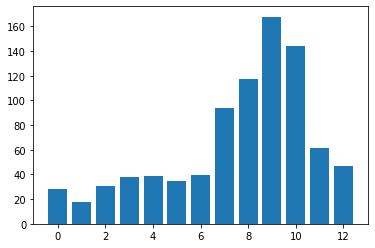

In [ ]:
a=0
price=0
count=0
y=[]
#z=[0,1,2,3,4,5,6,7,8]
for i in range(train.shape[0]):
  x=train["lat"].values[i]
  
  if x==a:
    price+=train["price_sq_lot"].values[i]
    count=count+1
  
  if x>a:
    #print(count)
    y.append(price/count)
    price=0
    count=0
    a=a+1
y.append(price/count)
print(y,z)

plt.bar(z,y)
plt.show()


In [ ]:
a=statistics.mean(y)
b=statistics.stdev(y)
for i in range(len(y)):
  
  y[i]=(y[i])/a
print(y)

[0.4252891685272178, 0.2673475449549554, 0.464458910706725, 0.5746216556811192, 0.5825796618136716, 0.5239897779059963, 0.5939953586598319, 1.4279593411054967, 1.7720279524584293, 2.542914764713532, 2.1790442940131296, 0.9301676670554031, 0.7156039024044927]


In [ ]:
j=0

for i in range(val.shape[0]):
  
  x=train["lat"].values[i]
  
  if x==j:
    train["lat"].values[i]=y[j]
  if x>j:
    j=j+1


In [ ]:
train

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sq_lot,price_check
2587,6/24/2014,380000.0,3.0,1860.0,15559.0,2.0,0.0,4.0,7.0,1860.0,0.0,1963.0,0.0,0.666356,0.425289,-121.646,1110.0,11586.0,24.423163,0
10316,4/6/2015,750000.0,3.0,2350.0,715690.0,1.5,0.0,4.0,9.0,2350.0,0.0,1979.0,0.0,0.666356,0.425289,-121.971,1280.0,325393.0,1.047940,0
10047,6/19/2014,335000.0,4.0,2030.0,103672.0,1.0,0.0,4.0,7.0,2030.0,0.0,1969.0,0.0,0.666356,0.425289,-121.973,1560.0,325393.0,3.231345,0
6119,3/9/2015,245000.0,3.0,1670.0,24650.0,1.0,0.0,4.0,7.0,1670.0,0.0,1974.0,0.0,0.666356,0.425289,-122.026,1810.0,19465.0,9.939148,0
314,8/25/2014,360000.0,4.0,3730.0,16980.0,1.0,0.0,4.0,7.0,2150.0,1580.0,1974.0,0.0,0.666356,0.425289,-122.022,1880.0,16963.0,21.201413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,12/3/2014,245560.0,2.0,1260.0,9693.0,1.0,0.0,3.0,7.0,1260.0,0.0,1957.0,0.0,0.687223,12.000000,-122.365,1800.0,9693.0,25.333746,0
5377,3/10/2015,285000.0,4.0,2120.0,6865.0,1.0,0.0,3.0,7.0,1060.0,1060.0,1954.0,0.0,1.261600,12.000000,-122.337,1460.0,7780.0,41.514931,0
12533,4/12/2015,407500.0,4.0,1900.0,9075.0,2.0,0.0,3.0,7.0,1900.0,0.0,1988.0,0.0,1.261600,12.000000,-122.352,1800.0,8460.0,44.903581,0
13907,10/14/2014,389950.0,3.0,1580.0,9049.0,1.0,0.0,3.0,8.0,1580.0,0.0,1966.0,0.0,0.687223,12.000000,-122.375,2100.0,8446.0,43.093159,0


In [ ]:
path="/content/Data.csv"
df=pd.read_csv(path)
df.head()

,Area in sq.ft,Width of road in ft,Crimes per month,Average household income,Distance to railway station in kms,Distance to airport in kms,Distance to religious places in kms,Distance from slum in kms,Distance to state run liquor shop in kms,Education quality,Sports facility,Local traffic,Quality of life,Access to supermarket,Pollution levels,Medical treatment,Road condition,Price in Rupees
0,164.972723,9.915223,12,1.635741e+04,6.775366,27.487403,4.155237,0.926085,0.936833,0.809318,0.496252,0.356807,0.011381,0.428218,0.482694,0.567724,0.342930,2.068834e+06
1,2723.900267,44.604048,9,1.214970e+06,18.999673,5.340053,3.937164,1.070621,1.088449,0.777376,0.438375,0.650271,0.406721,0.846581,0.682329,0.700829,0.576454,4.690106e+07
2,2432.995477,28.897256,8,7.030689e+05,4.990584,22.529498,0.039635,4.985725,5.031872,0.006053,0.941866,0.687963,0.470225,0.610037,0.896260,0.100827,0.815345,4.502143e+07
3,1420.784809,41.560910,12,5.904911e+05,7.788671,10.524455,4.104630,0.902182,0.947724,0.812495,0.296451,0.191345,0.974053,0.939640,0.556187,0.761762,0.858401,3.350062e+07
4,4182.860620,35.240153,20,1.474046e+06,9.846121,8.481228,3.259715,1.806652,1.835332,0.636731,0.875282,0.502766,0.844646,0.753803,0.105140,0.768884,0.675485,9.434848e+07
